$\Large\textbf{Lab 3.}$ $\large\textbf{Exercise 1.}$



In the last lab, when we tried to solve certain problems of the form $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$ using gradient descent algorithm, we noticed that the algorithm needed a large number of iterations to find the minimizer. Today we will discuss some remedy measures for this issue.  

Consider the problem $\min_{\mathbf{x}} f(\mathbf{x}) = 1500x_1^2 + 4x_1 x_2 +  x_2^2$. 

Note that the function $f(\mathbf{x})$ is twice continuously differentiable. First let us investigate the Hessian $\nabla^2 f(\mathbf{x})$ of the function. 

Note that the Hessian $\nabla^2 f(\mathbf{x})$ of the function $f(\mathbf{x})$ is positive definite. 

Due to the positive definite nature of the Hessian, we shall find the condition number of the Hessian given by $\kappa\left (\nabla^2 f(\mathbf{x}) \right ) = \frac{\lambda_{\max} \left (\nabla^2 f(\mathbf{x}) \right )}{\lambda_{\min} \left (\nabla^2 f(\mathbf{x}) \right )}$, where $\lambda_{\max}(\mathbf{A})$ denotes the maximum eigen value of matrix $\mathbf{A}$ and $\lambda_{\min}(\mathbf{A})$ denotes the minimum eigen value of matrix $\mathbf{A}$.  




**Q 2**

$\textbf{Question:}$ Write code to find the Hessian matrix of the function $f(\mathbf{x}) = 1500x_1^2 + 4x_1 x_2 +  x_2^2$ and its condition number. 

In [1]:
import numpy as np 

#method to find Hessian matrix:
def evalh(x): 
  assert type(x) is np.ndarray 
  assert len(x) == 2

  return np.array([[3000, 4],[4,2]])

#method to find the condition number of any square matrix: :
def find_condition_number(A):
  assert type(A) is np.ndarray
  assert A.shape[0] == A.shape[1]

  return np.linalg.cond(A)

In [2]:
from numpy.linalg import eig

In [3]:
K=np.array([[3000,4],[4,2]])
w,v=eig(K)
print('eigenvalues:',w)
print('eigenvectors:',v)
w[0]

eigenvalues: [3.00000534e+03 1.99466312e+00]
eigenvectors: [[ 0.99999911 -0.00133422]
 [ 0.00133422  0.99999911]]


3000.0053368817607

The condition number of the Hessian plays a major role in the progress of the iterates of gradient descent towards the optimal solution point. Typically a large value of the condition number indicates that the problem is $\textbf{ill-conditioned}$ and hence leads to slow progress of the iterates towards the optimal solution point. Now we shall discuss a method which would help in better $\textbf{conditioning}$ of the problem and hence would help in speeding up the progress of the iterates towards the optimal solution point. 

Let us first illustrate an equivalent transformation of the problem $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$. Consider the transformation $\mathbf{x}=\mathbf{My}$ where $\mathbf{M}\in {\mathbb{R}}^{n \times n}$ is an invertible matrix and $\mathbf{y} \in {\mathbb{R}}^n$ and consider the equivalent problem $\min_{\mathbf{y} \in {\mathbb{R}}^n} g(\mathbf{y}) \equiv \min_{\mathbf{y} \in {\mathbb{R}}^n} f(\mathbf{My})$. 

$\textbf{Check:}$ Why are the two problems $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$ and $\min_{\mathbf{y} \in {\mathbb{R}}^n} g(\mathbf{y})$  equivalent? 

Note that the gradient $\nabla_{\mathbf{y}} g(\mathbf{y}) = \mathbf{M}^\top \nabla_{\mathbf{x}} f(\mathbf{x})$ and the Hessian is $\nabla^2_{\mathbf{y}} g(\mathbf{y}) = \mathbf{M}^\top \nabla^2_{\mathbf{x}} f(\mathbf{x}) \mathbf{M}$. 

Hence the gradient descent update to solve $\min_{\mathbf{y} \in {\mathbb{R}}^n} g(\mathbf{y})$ becomes: 


\begin{align}
{\mathbf{y}}^{k+1} &= {\mathbf{y}}^{k} - \eta \nabla_{\mathbf{y}} g({\mathbf{y}}^{k}) \\
\end{align}

Pre-multiplying by $\mathbf{M}$, we have:
\begin{align}
{\mathbf{M}\mathbf{y}}^{k+1} &= {\mathbf{M}\mathbf{y}}^{k} -  \eta \mathbf{M} \nabla_{\mathbf{y}} g({\mathbf{y}}^{k})  \\
\implies \mathbf{x}^{k+1} &= \mathbf{x}^{k} - \eta \mathbf{MM}^\top \nabla_{\mathbf{x}} f({\mathbf{x}}^{k}) 
\end{align}


Letting $\mathbf{D} = \mathbf{MM}^\top$, we see that the update is of the form:
\begin{align}
\mathbf{x}^{k+1} &= \mathbf{x}^{k} - \eta \mathbf{D} \nabla f({\mathbf{x}}^{k}) 
\end{align}

Note that the matrix $\mathbf{D}$ is symmetric and positive definite and hence can be written as $\mathbf{D} = \mathbf{B}^2$, where $\mathbf{B}$ is also symmetric and positive definite. Denoting $\mathbf{B}= \mathbf{D}^{\frac{1}{2}}$, we see that a useful choice for the matrix $\mathbf{M}$ is $\mathbf{M} = \mathbf{B} = \mathbf{D}^{\frac{1}{2}}$. 

The matrix $\mathbf{D}$ is called a $\textbf{scaling}$ matrix and helps in scaling the Hessian. We will consider $\mathbf{D}$ to be a diagonal matrix. Thus it would be useful to find a suitable candidate of the scaling matrix at each iteration which could help in significant progress of the iterates towards the optimal solution. 




This discussion leads to the following algorithm:
\begin{align}
& \textbf{Input:} \text{ Starting point $x^0$, Stopping tolerance $\tau$}  \\
& \textbf{Initialize } k=0 \\ 
& \mathbf{p}^k =-\nabla f(\mathbf{x}^k) \\ 
&\textbf{While } \| \mathbf{p}^k \|_2 > \tau \text{ do:}  \\   
&\quad \quad \text{ Choose a suitable scaling matrix }\mathbf{D}^k. \\ 
&\quad \quad \eta^k = \arg\min_{\eta\geq 0} f(\mathbf{x}^k + \eta  \mathbf{D}^k \mathbf{p}^k) = \arg\min_{\eta\geq 0} f(\mathbf{x}^k - \eta  \mathbf{D}^k \nabla f(\mathbf{x}^k)) \\
&\quad \quad \mathbf{x}^{k+1} = \mathbf{x}^k + \eta^k \mathbf{D}^k \mathbf{p}^k = \mathbf{x}^k - \eta^k  \mathbf{D}^k \nabla f(\mathbf{x}^k)  \\ 
&\quad \quad k = {k+1} \\ 
&\textbf{End While} \\
&\textbf{Output: } \mathbf{x}^k
\end{align}

Note that the update step in the modified gradient descent scheme uses a scaled gradient. Thus it becomes important to set up some criteria for choosing the $\mathbf{D}^k$ matrix in every iteration. In this exercise, we will assume $\mathbf{D}^k$ to be a diagonal matrix. The following questions will help in designing a suitable $\mathbf{D}^k$.

**Q 4**

$\textbf{Question:}$ Based on our discussion on condition number and the derivation of the gradient descent scheme with scaling, can you identify and write down the matrix $\mathbf{Q}$ whose condition number needs to be analyzed in the new gradient scheme with scaling? 

$\textbf{Your Answer:}$

As discussed at the begining that the condition number of the hessian of the given function need to be analyzed.
So, $\mathbf{Q}$ is the hessian matrix of $g(y)$. And we know that the hessian is given as $\nabla^2_{\mathbf{y}} g(\mathbf{y}) = \mathbf{M}^\top \nabla^2_{\mathbf{x}} f(\mathbf{x}) \mathbf{M}=\mathbf{Q}$.

**Q 5**

$\textbf{Question:}$ Based on the matrix $\mathbf{Q}$, can you come up with a useful choice for $\mathbf{D}^k$ (assuming $\mathbf{D}^k$ to be diagonal)?

$\textbf{Your Answer:}$

Our task is to make the condition number of the hessian matrix, $\nabla^2_{\mathbf{y}} g(\mathbf{y})$, to be small. If we can choose $\mathbf{M}$ such that both the eigenvalues of $\mathbf{Q}$ becomes equal (In order to make condition number as $1$). And wee know that $\mathbf{D}$ is assumed as diagonal matrix and $\mathbf{M} = \mathbf{D}^{\frac{1}{2}}$. Hence, $\mathbf{M}$ is also a diagonal matrix.

So, let \begin{equation} \ \mathbf{M} =
\begin{bmatrix}
a & 0 \\ 0 & b
\end{bmatrix}
\end{equation}
Now,

$ \ \begin{equation}
\begin{split}
\mathbf{M}^\top \nabla^2_{\mathbf{x}} f(\mathbf{x}) \mathbf{M} &=
\begin{bmatrix}
a & 0 \\ 0 & b
\end{bmatrix}
\begin{bmatrix}
3000 & 4 \\ 4 & 2
\end{bmatrix}
\begin{bmatrix}
a & 0 \\ 0 & b
\end{bmatrix} \\
&=\begin{bmatrix}
3000a^2 & 4ab \\ 4ab & 2b^2
\end{bmatrix}
\end{split}
\end{equation}$ \\
and eigenvalues of this matrix will be equal if $3000a^2=2b^2 \implies a=\frac{1}{\sqrt{3000}} \ and \ b=\frac{1}{\sqrt{2}}$

$\implies \begin{equation} \ \mathbf{M} =
\begin{bmatrix}
\frac{1}{\sqrt{3000}} & 0 \\ 0 & \frac{1}{\sqrt{2}}
\end{bmatrix}
\end{equation}$ \\

Hence, $\ \mathbf{D}=\begin{bmatrix}
\frac{1}{3000} & 0 \\ 0 & \frac{1}{2}
\end{bmatrix} $

And also since Hessian is not dependent on $x$ so $\mathbf{D^k}= \mathbf{D} \ \ ∀ k$

Write code to find the matrix $\mathbf{D}^k$. 

In [4]:
#The method defines a way to construct D_k matrix used in scaling the gradient in the modified gradient descent scheme
def compute_D_k(x):
  assert type(x) is np.ndarray
  assert len(x) == 2
  
  return np.array([[1/3000, 0],[0, 1/2]])
  

In [5]:
#Now we will define a Python function which will compute and return the objective function value 
def evalf(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the objective function value
  #compute the function value and return it 
  return 1500*x[0]**2 + 4*x[0]*x[1] + x[1]**2

In [6]:
#Now we will define a Python function which will compute and return the gradient value as a numpy array 
def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the gradient value
  #compute the gradient value and return it 
  return np.array([3000*x[0] + 4*x[1], 4*x[0] + 2*x[1]])

In [7]:
#Complete the module to compute the steplength by using the closed-form expression
def compute_steplength_exact(gradf, A): #add appropriate arguments to the function 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(A) is np.ndarray and A.shape[0] == 2 and  A.shape[1] == 2 #allow only a 2x2 array
   
  a_1 =np.linalg.multi_dot([gradf,gradf])
  a_22=np.matmul(np.transpose(gradf),A)
  a_2 =np.linalg.multi_dot([a_22,gradf])
  step_length=a_1/a_2
  
  return step_length

In [8]:
#Complete the module to compute the steplength by using the closed-form expression
def compute_steplength_backtracking(x, gradf, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(gradf) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(alpha_start) is float and alpha_start>=0. 
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0. 
  
  alpha = alpha_start
  pk=-gradf
  while evalf(x+alpha*pk)>evalf(x)+gamma*alpha*np.linalg.multi_dot([gradf,pk]):
    alpha=rho*alpha
  
  #print('final step length:',alpha)
  return alpha

In [9]:
def compute_steplength_backtracking_scaled_direction(x, gradf, direction, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(gradf) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(direction) is np.ndarray and len(direction) == 2 
  assert type(alpha_start) is float and alpha_start>=0. 
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0. 
  
  
  alpha = alpha_start
  while evalf(x+alpha*direction)>evalf(x)+gamma*alpha*np.linalg.multi_dot([gradf,direction]):
    alpha=rho*alpha

  return alpha 

In [10]:
#line search type 
EXACT_LINE_SEARCH = 1
BACKTRACKING_LINE_SEARCH = 2
CONSTANT_STEP_LENGTH = 3
BACKTRACKING_LINE_SEARCH_SCALING = 4

In [11]:
#complete the code for gradient descent to find the minimizer
def find_minimizer_gd(start_x, tol, line_search_type, *args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  
  A = np.array([[3000, 4],[4,2]]) #Hessian
  x = start_x
  g_x = evalg(x)

  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]

  k = 0

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
  
    if line_search_type == EXACT_LINE_SEARCH:
      step_length = compute_steplength_exact(g_x, A) #call the new function you wrote to compute the steplength
      #raise ValueError('EXACT LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking(x,g_x, alpha_start,rho, gamma) #call the new function you wrote to compute the steplength
      #raise ValueError('BACKTRACKING LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == CONSTANT_STEP_LENGTH: #do a gradient descent with constant step length
      step_length = 0.1
    else:  
      raise ValueError('Line search type unknown. Please check!')
    
    #implement the gradient descent steps here   
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

  return x, evalf(x),k

In [12]:
#complete the code for gradient descent with scaling to find the minimizer

def find_minimizer_gdscaling(x, tol, line_search_type,*args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 

  g_x = evalg(x)
  D_k = compute_D_k(x)
  
  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH_SCALING):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]

  k = 0
  while (np.linalg.norm(g_x) > tol):
    direction = -np.matmul(D_k, g_x)
    if line_search_type == BACKTRACKING_LINE_SEARCH_SCALING:
      step_length = compute_steplength_backtracking_scaled_direction(x, g_x, direction, alpha_start, rho, gamma)
    else:  
      raise ValueError('Line search type unknown. Please check!')

    #implement the gradient descent steps here   
    x = np.add(x, np.multiply(step_length,direction)) #update x = x + step_length*direction
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point
  return x, evalf(x), k

In [13]:
my_start_x = np.array([1.,4000.])
my_tol= 1e-12

**Q 7**

$f(x)=1500x_1^2+4x_1x_2+x_2^2$ \\

$\frac{df(x)}{dx_1}=3000x_1+4x_2 \ and \ \frac{df(x)}{dx_2}=4x_1+2x_1$

Solving, $\frac{df(x)}{dx_1}=0 \ and \ \frac{df(x)}{dx_2}=0 \ $ gives $(x_1x_2)=(0,0)$ \\
Now at $(x_1,x_2)=(0,0)$ \\
$f_{xx}f_{yy}-f_{xy}^2>0 \ and \ f_{xx}>0 \ and \ f_{yy}>0$ \\
Hence, $(0,0)$ is the minimizer of given function and $0$ is the minimum value.

**Q 8**

In [14]:
#check gradient descent with exact line search 
opt_x,opt_f,iter=find_minimizer_gd(my_start_x,my_tol,EXACT_LINE_SEARCH)
print('Gradient Descent algorithm(without scaling) with EXACT LINE SEARCH:')
print('Minimizer: ',opt_x)
print('Minimum Obj fn Value: ',opt_f)
print('No. of iterations taken: ', iter)

Gradient Descent algorithm(without scaling) with EXACT LINE SEARCH:
Minimizer:  [-7.44595231e-16  4.61544291e-13]
Minimum Obj fn Value:  2.12480110780353e-25
No. of iterations taken:  14075


In [15]:
#check gradient descent with backtracking line search 
alpha_start = 1.
rho = 0.5
gamma = 0.5

opt_x2,opt_f2,iter2=find_minimizer_gd(my_start_x,my_tol,BACKTRACKING_LINE_SEARCH,alpha_start,rho,gamma)
print('Gradient Descent algorithm(without scaling) with BACKTRACKING LINE SEARCH:')
print('Minimizer: ',opt_x2)
print('Minimum Obj fn Value: ',opt_f2)
print('No. of iterations taken: ', iter2)

Gradient Descent algorithm(without scaling) with BACKTRACKING LINE SEARCH:
Minimizer:  [-4.78532202e-16  4.53575301e-13]
Minimum Obj fn Value:  2.0520584176089396e-25
No. of iterations taken:  21985


In [16]:
#check gradient descent with scaling and backtracking line search 
alpha_start = 1.
rho = 0.5
gamma = 0.5

opt_x3,opt_f3,iter3=find_minimizer_gdscaling(my_start_x,my_tol,BACKTRACKING_LINE_SEARCH_SCALING, alpha_start,rho,gamma)
print('Gradient Descent algorithm(with scaling) with BACKTRACKING LINE SEARCH:')
print('Minimizer: ',opt_x3)
print('Minimum Obj fn Value: ',opt_f3)
print('No. of iterations taken: ', iter3)

Gradient Descent algorithm(with scaling) with BACKTRACKING LINE SEARCH:
Minimizer:  [-2.31674405e-18  9.60515434e-16]
Minimum Obj fn Value:  9.217397790469283e-31
No. of iterations taken:  16


Clearly we can see that in case of "without scaling" the number of iterations taken is significantly high than that in case of "with scaling".

Hence, Gradient descent algorithm with scaling is the improved version. It takes very less time as compared to earlier.

**Q 9**

In [17]:
alphas=[1.0,0.9,0.75,0.6,0.5,0.4,0.25,0.1,0.01]

In [18]:
#code for without scaling
x_values_wo_scaling={}
obj_values_wo_scaling={}
iters_wo_scaling={}

for i in alphas:
  x_values_wo_scaling[i],obj_values_wo_scaling[i],iters_wo_scaling[i]=find_minimizer_gd(my_start_x,my_tol,BACKTRACKING_LINE_SEARCH, i ,rho,gamma)

In [19]:
x_values_wo_scaling

{0.01: array([-5.80852788e-16,  4.86459735e-13]),
 0.1: array([-7.24091328e-16,  4.84454819e-13]),
 0.25: array([-4.78532202e-16,  4.53575301e-13]),
 0.4: array([-7.24091328e-16,  4.84454819e-13]),
 0.5: array([-4.78532202e-16,  4.53575301e-13]),
 0.6: array([-6.07554226e-16,  4.94036636e-13]),
 0.75: array([-7.18643891e-16,  4.89175378e-13]),
 0.9: array([-5.48799355e-16,  4.71515450e-13]),
 1.0: array([-4.78532202e-16,  4.53575301e-13])}

In [20]:
obj_values_wo_scaling

{0.01: 2.3601891237044125e-25,
 0.1: 2.3407977615582728e-25,
 0.25: 2.0520584176089396e-25,
 0.4: 2.3407977615582728e-25,
 0.5: 2.0520584176089396e-25,
 0.6: 2.43425264283868e-25,
 0.75: 2.386610528547938e-25,
 0.9: 2.2174352131747877e-25,
 1.0: 2.0520584176089396e-25}

In [21]:
iters_wo_scaling

{0.01: 5509,
 0.1: 11362,
 0.25: 21985,
 0.4: 11362,
 0.5: 21985,
 0.6: 6887,
 0.75: 6750,
 0.9: 15941,
 1.0: 21985}

In [22]:
#code for with scaling
x_values_with_scaling={}
obj_values_with_scaling={}
iters_with_scaling={}

for i in alphas:
  x_values_with_scaling[i],obj_values_with_scaling[i],iters_with_scaling[i]=find_minimizer_gdscaling(my_start_x,my_tol,BACKTRACKING_LINE_SEARCH_SCALING, i ,rho,gamma)

In [23]:
x_values_with_scaling

{0.01: array([-3.51028779e-16,  1.39670836e-14]),
 0.1: array([-3.34815103e-16,  1.32481337e-14]),
 0.25: array([-2.68853026e-16,  1.05480788e-14]),
 0.4: array([-3.26530890e-16,  1.27315971e-14]),
 0.5: array([-2.51144512e-16,  9.75949896e-15]),
 0.6: array([-3.37385169e-16,  1.30849588e-14]),
 0.75: array([-2.78273450e-16,  1.07784868e-14]),
 0.9: array([-1.54825431e-16,  5.99636318e-15]),
 1.0: array([-2.31674405e-18,  9.60515434e-16])}

In [24]:
obj_values_with_scaling

{0.01: 3.602998362211868e-28,
 0.1: 3.2592207464795465e-28,
 0.25: 2.0834135979657747e-28,
 0.4: 3.0539815808527928e-28,
 0.5: 1.800539902805011e-28,
 0.6: 3.2430059206322154e-28,
 0.75: 2.203324807217381e-28,
 0.9: 6.819918471923904e-29,
 1.0: 9.217397790469283e-31}

In [25]:
iters_with_scaling

{0.01: 4146,
 0.1: 397,
 0.25: 147,
 0.4: 83,
 0.5: 62,
 0.6: 47,
 0.75: 32,
 0.9: 21,
 1.0: 16}

In [26]:
import matplotlib.pyplot as plt

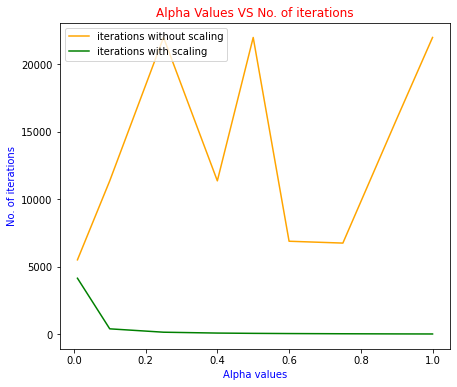

In [27]:
#gradient descent algorithm (with scaling) with backtracking line search
#list which contains no of iterations for corrs alpha values in list 'alphas'
iters_1=[iters_wo_scaling[i] for i in alphas]

#gradient descent algorithm (without scaling) with backtracking line search
#list which contains no of iterations for corrs alpha values in list 'alphas'
iters_2=[iters_with_scaling[i] for i in alphas]

plt.figure(figsize=(7,6))
plt.plot(alphas, iters_1,label ='iterations without scaling',color='orange')
plt.plot(alphas, iters_2,label ='iterations with scaling',color='green')
plt.xlabel("Alpha values",color='b')
plt.ylabel('No. of iterations',color='b')
plt.title('Alpha Values VS No. of iterations',color='r')
plt.legend(loc='upper left')
plt.show()

Here also  Gradient descent algorithm with scaling takes very less number of iterations as compared to algorithm without scaling. It is hard to choose alpha for BACKTRACKING LINE SEARCH without scaling as the is no proper trend in the above orange curve. While for larger alpha the number of iterations in case of with scaling is lower. 

**Q 10**

In [28]:
rhos=[0.9, 0.8, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]

In [29]:
#code for without scaling
x_values_wo_scaling2={}
obj_values_wo_scaling2={}
iters_wo_scaling2={}

for i in rhos:
  x_values_wo_scaling2[i],obj_values_wo_scaling2[i],iters_wo_scaling2[i]=find_minimizer_gd(my_start_x,my_tol,BACKTRACKING_LINE_SEARCH,alpha_start,i,gamma)

In [30]:
x_values_wo_scaling2

{0.01: array([-6.03891924e-16,  4.89972672e-13]),
 0.1: array([-4.35224428e-16,  4.42644725e-13]),
 0.25: array([-5.67128954e-16,  4.70177132e-13]),
 0.4: array([-5.16461460e-16,  4.67846629e-13]),
 0.5: array([-4.78532202e-16,  4.53575301e-13]),
 0.6: array([-7.07691748e-16,  4.70469643e-13]),
 0.75: array([-7.15454842e-16,  4.83616543e-13]),
 0.8: array([-6.99968590e-16,  4.40149178e-13]),
 0.9: array([-6.44686128e-16,  4.90962904e-13])}

In [31]:
obj_values_wo_scaling2

{0.01: 2.394366854291179e-25,
 0.1: 1.9544788340231146e-25,
 0.25: 2.204823842206756e-25,
 0.4: 2.1831406770108246e-25,
 0.5: 2.0520584176089396e-25,
 0.6: 2.2076113616544364e-25,
 0.75: 2.332687511412074e-25,
 0.8: 1.932338703071826e-25,
 0.9: 2.404019351870065e-25}

In [32]:
iters_wo_scaling2

{0.01: 17463,
 0.1: 45435,
 0.25: 24570,
 0.4: 20049,
 0.5: 21985,
 0.6: 15834,
 0.75: 3135,
 0.8: 1471,
 0.9: 127}

In [33]:
#code for with scaling
x_values_with_scaling2={}
obj_values_with_scaling2={}
iters_with_scaling2={}

for i in rhos:
  x_values_with_scaling2[i],obj_values_with_scaling2[i],iters_with_scaling2[i]=find_minimizer_gdscaling(my_start_x,my_tol,BACKTRACKING_LINE_SEARCH_SCALING,alpha_start,i,gamma)

In [34]:
x_values_with_scaling2

{0.01: array([-5.88632151e-16,  4.39928337e-13]),
 0.1: array([-6.22892805e-16,  4.51919078e-13]),
 0.25: array([-6.9534609e-16,  4.5561674e-13]),
 0.4: array([-2.10920879e-18,  1.38155681e-15]),
 0.5: array([-2.31674405e-18,  9.60515434e-16]),
 0.6: array([-2.68496827e-18,  1.53311688e-15]),
 0.75: array([-3.59593964e-18,  9.57478862e-16]),
 0.8: array([-3.89959677e-18,  7.65599523e-16]),
 0.9: array([-1.90920422e-16,  3.38018326e-15])}

In [35]:
obj_values_with_scaling2

{0.01: 1.9302084997635662e-25,
 0.1: 2.0368685744853975e-25,
 0.25: 2.0704462793405916e-25,
 0.4: 1.903716407388883e-30,
 0.5: 9.217397790469283e-31,
 0.6: 2.3447954703965872e-30,
 0.75: 9.223897999650174e-31,
 0.8: 5.970107943515186e-31,
 0.9: 6.352016622002106e-29}

In [36]:
iters_with_scaling2

{0.01: 130,
 0.1: 23,
 0.25: 16,
 0.4: 16,
 0.5: 16,
 0.6: 15,
 0.75: 15,
 0.8: 15,
 0.9: 14}

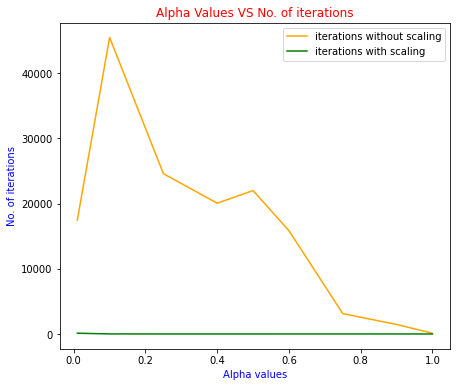

In [37]:
#gradient descent algorithm (with scaling) with backtracking line search
#list which contains no of iterations for corrs alpha values in list 'alphas'
iters_11=[iters_wo_scaling2[i] for i in rhos]

#gradient descent algorithm (without scaling) with backtracking line search
#list which contains no of iterations for corrs alpha values in list 'alphas'
iters_22=[iters_with_scaling2[i] for i in rhos]

plt.figure(figsize=(7,6))
plt.plot(alphas, iters_11,label ='iterations without scaling',color='orange')
plt.plot(alphas, iters_22,label ='iterations with scaling',color='green')
plt.xlabel("Alpha values",color='b')
plt.ylabel('No. of iterations',color='b')
plt.title('Alpha Values VS No. of iterations',color='r')
plt.legend(loc='upper right')
plt.show()

Clearly Gradient descent algorithm with scaling takes very less number of iterations as compared to that in without scaling. Change in alpha is causing a significant change in the no. of iterations in case of without scaling. While there is negligible change in case of with scaling.

The minimizer and minimum fn value is almost same for all alphas in case of without scaling ($x_1$ of order 1e-16 and $x_2$ with order 1e-13 and min fn value of order 1e-25). But even though the tolerence is same, in case of with scaling, minimizers and minimum fn values are of different order for different alpha.